### Student Information
Name: 王豐連

Student ID: 105061237

GitHub ID: Fenglien

Kaggle name: FW

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

# Take Home Exercises 

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [6]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text)
test_counts = count_vect.fit_transform(test_df.text)

train_words = count_vect.get_feature_names();    
train_frequencies = train_counts.toarray().sum(axis=0)  
test_words = count_vect.get_feature_names();    
test_frequencies = test_counts.toarray().sum(axis=0)   

d_train = dict(zip(train_words,train_frequencies))
d_test = dict(zip(test_words,test_frequencies))

train_result = sorted(d_train.items(), key=lambda d_train: d_train[1], reverse=True) 
test_result = sorted(d_test.items(), key=lambda d_test: d_test[1], reverse=True) 

train_sort_features = []
train_sort_frequencies = []
test_sort_features = []
test_sort_frequencies = []
for i in train_result:
    train_sort_features.append(i[0])
    train_sort_frequencies.append(i[1])
for i in test_result:
    test_sort_features.append(i[0])
    test_sort_frequencies.append(i[1])

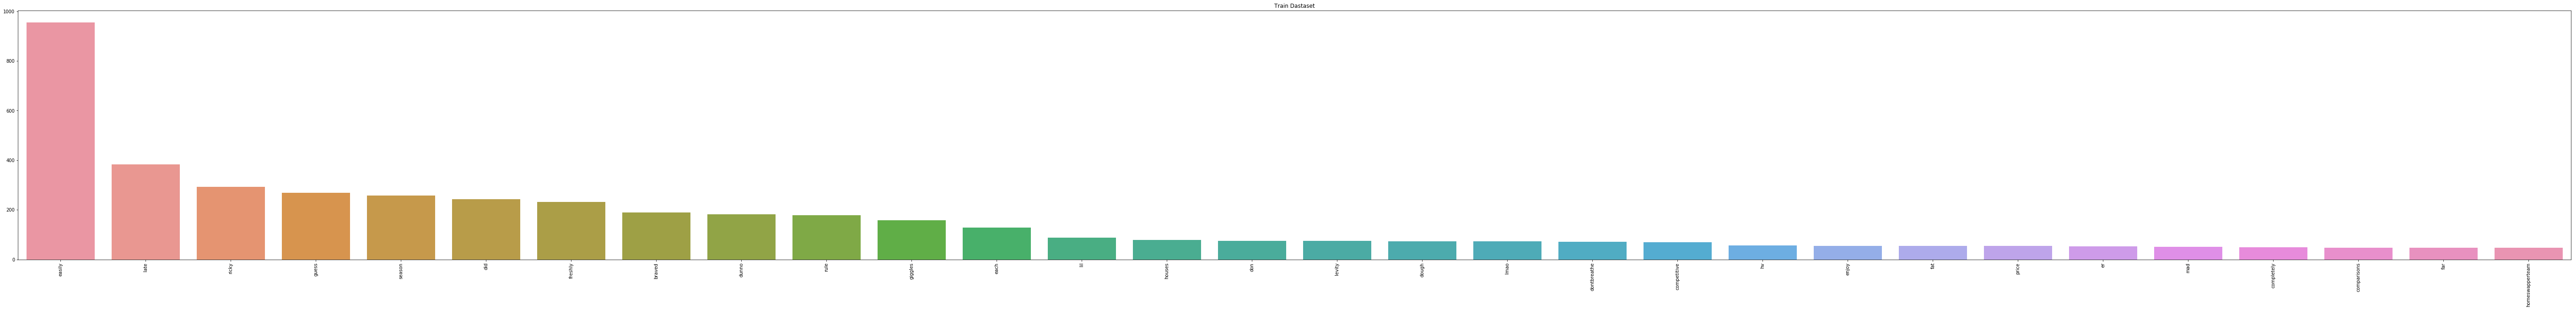

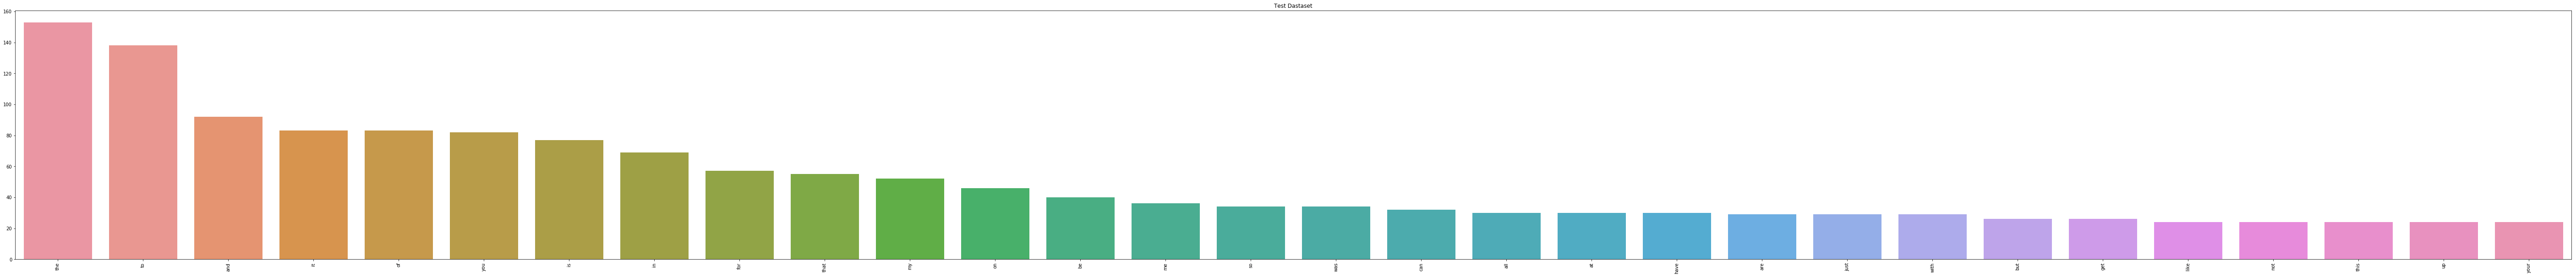

In [7]:
plt.subplots(figsize=(100, 10))
plt.title('Train Dastaset')
g = sns.barplot(x= train_sort_features[:30], 
            y=train_sort_frequencies[:30])
g.set_xticklabels(train_sort_features[:30], rotation = 90);

plt.subplots(figsize=(100, 10))
plt.title('Test Dastaset')
g = sns.barplot(x= test_sort_features[:30], 
            y=test_sort_frequencies[:30])
g.set_xticklabels(test_sort_features[:30], rotation = 90);

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [7]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [8]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [9]:
#group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

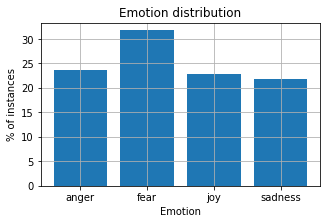

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [13]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [14]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [15]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [16]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [18]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [19]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [20]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [21]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['cheerfully',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country',
 'cry',
 'customer',
 'damn']

In [23]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [24]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
BOW_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_1000.fit(train_df['text'])

train_data_BOW_features_1000 = BOW_1000.transform(train_df['text'])

## check dimension
print(train_data_BOW_features_1000.shape)
print(train_data_BOW_features_1000.toarray())
print(BOW_1000.get_feature_names()[100:110])

(3613, 1000)
[[0.         0.09312678 0.         ... 0.         0.         0.        ]
 [0.         0.35583291 0.         ... 0.         0.         0.        ]
 [0.         0.08122015 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.14350793 0.         ... 0.         0.         0.        ]
 [0.         0.0848796  0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'fear', 'joy', 'joy', 'anger', 'anger', 'anger', 'sadness',
       'fear', 'anger'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [27]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.64


In [28]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

    accuracy                           0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347



In [29]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 16  9  4]
 [15 70  9 16]
 [ 5 13 54  7]
 [ 9 14  9 42]]


In [30]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

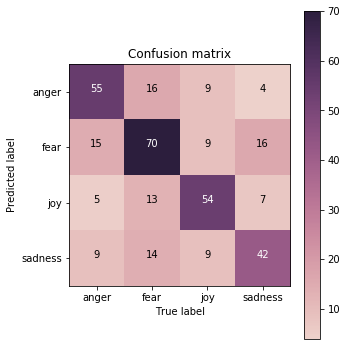

In [31]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here
The diagonal values are true positive, and the others are wrong-predicted.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [33]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


# Use naive bayes to classify data
NB = MultinomialNB(alpha=1.0)
NB.fit(X_train,y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print(classification_report(y_true=y_test, y_pred=y_test_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.79
testing accuracy: 0.72
              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

   micro avg       0.72      0.72      0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347

[[55 14  5 10]
 [ 6 91  5  8]
 [ 9  7 56  7]
 [ 8 11  8 47]]


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here

Decision Trees are very flexible, easy to understand, and easy to debug. They will work with classification problems and regression problems. So if we are trying to predict a categorical value or trying to predict a continuous value, decision Trees will handle both problems. Probably one of the coolest things about Decision Trees is they only need a table of data and they will build a classifier directly from that data without needing any up front design work to take place. To some degree properties that don't matter won't be chosen as splits and will get eventually pruned.

However, simple decision trees tend to overfit the training data more so that other techniques which means we generally have to do tree pruning and tune the pruning procedures. We didn't have any upfront design cost, but we'll pay that back on tuning the trees performance. Also simple decision trees divide the data into squares so building clusters around things means it has to split a lot to encompass clusters of data. Splitting a lot leads to complex trees and raises probability we are overfitting. Tall trees get pruned back so while we can build a cluster around some feature in the data it might not survive the pruning process. There are other techniques like surrogate splits which let we split along several variables at once creating splits in the space that aren't either horizontal or perpendicular ( 0 < slope < infinity ). However, the tree starts to become harder to understand, and its complex to implement these algorithms. Other techniques like boosting and random forest decision trees can perform quite well, and some feel these techniques are essential to get the best performance out of decision trees. Again this adds more things to understand and use to tune the tree and hence more things to implement. In the end the more we add to the algorithm the taller the barrier to using it.

Naive Bayes requires us to build a classification by hand. There's not way to just toss a bunch of tabular data at it and have it pick the best features it will use to classify. Picking which features matter is up to us. Decisions trees will pick the best features for us from tabular data. If there were a way for Naive Bayes to pick features we'd be getting close to using the same techniques that make decision trees work like that. Give this fact that means we may need to combine Naive Bayes with other statistical techniques to help guide us towards what features best classify and that could be using decision trees. Naive bayes will answer as a continuous classifier. There are techniques to adapt it to categorical prediction however they will answer in terms of probabilities like Bayes can perform quite well, and it doesn't over fit nearly as much so there is no need to prune or process the network. That makes them simpler algorithms to implement. However, they are harder to debug and understand because it's all probabilities getting multiplied 1000's of times so we have to be careful to test it's doing what we expect. Naive bayes does quite well when the training data doesn't contain all possibilities so it can be very good with low amounts of data. Decision trees work better with lots of data compared to Naive Bayes.

Naive Bayes is used a lot in robotics and computer vision, and does quite well with those tasks. Decision trees perform very poorly in those situations. Teaching a decision tree to recognize poker hands by looking a millions of poker hands does very poorly because royal flushes and quads occurs so little it often gets pruned out. If it's pruned out of the resulting tree it will misclassify those important hands (recall tall trees discussion from above). Now just think if we are trying to diagnose cancer using this. Cancer doesn't occur in the population in large amounts, and it will get pruned out more likely. Good news is this can be handled by using weights so we weight a winning hand or having cancer as higher than a loosing hand or not having cancer and that boosts it up the tree so it won't get pruned out. Again this is the part of tuning the resulting tree to the situation that I discussed earlier.

Decision trees are neat because they tell you what inputs are the best predicators of the outputs so often decision trees can guide you to find if there is a statistical relationship between a given input to the output and how strong that relationship is. Often the resulting decision tree is less important than relationships it describes. So decision trees can be used a research tool as you learn about your data so you can build other classifiers.

Dicing between using decision trees vs naive bayes to solve a problem often times it best to test each one. Build a decision tree and build a naive bayes classifier then have a shoot out using the training and validation data you have. Which ever performs best will more likely perform better in the field.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
    * Trying different features (Feature engineering)
        -Eg. Word2Vec,PCA,LDA,FastText, Clustering......
    * Trying different models
    * Analyzing your results and interpret them to improve your feature engineering/model building process
    * Iterate through the steps above until finding a satisfying result
Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framwork, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![Fully Connected Network](pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [35]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

Using TensorFlow backend.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [36]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 490       anger
1875       fear
1146       fear
2878    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [37]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![Imgur](pics/pic2.png)

In [38]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
____________________________________________

### 6.4 Train

In [39]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 1s 164us/step - loss: 1.3264 - accuracy: 0.3701 - val_loss: 1.2686 - val_accuracy: 0.4524
Epoch 2/25
3613/3613 [==============================] - 0s 62us/step - loss: 0.9801 - accuracy: 0.6543 - val_loss: 0.9122 - val_accuracy: 0.6628
Epoch 3/25
3613/3613 [==============================] - 0s 66us/step - loss: 0.5664 - accuracy: 0.8021 - val_loss: 0.7511 - val_accuracy: 0.7176
Epoch 4/25
3613/3613 [==============================] - 0s 62us/step - loss: 0.3907 - accuracy: 0.8633 - val_loss: 0.7578 - val_accuracy: 0.7205
Epoch 5/25
3613/3613 [==============================] - 0s 67us/step - loss: 0.3062 - accuracy: 0.8981 - val_loss: 0.8070 - val_accuracy: 0.7118
Epoch 6/25
3613/3613 [==============================] - 0s 65us/step - loss: 0.2471 - accuracy: 0.9150 - val_loss: 0.8772 - val_accuracy: 0.6945
Epoch 7/25
3613/3613 [==============================] - 0s 61us/step - loss: 0.20

### 6.5 Predict on testing data

In [40]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[4.7493770e-04, 1.2077219e-01, 1.1765673e-02, 8.6698723e-01],
       [7.9836012e-05, 9.9956292e-01, 1.5846005e-04, 1.9881182e-04],
       [4.4943678e-01, 2.4788025e-01, 1.3412434e-01, 1.6855867e-01],
       [8.9813825e-12, 1.1894122e-09, 1.0000000e+00, 7.5186506e-09],
       [9.9899954e-01, 2.8576700e-05, 3.0366706e-08, 9.7192288e-04]],
      dtype=float32)

In [41]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'fear', 'anger', 'joy', 'anger'], dtype=object)

In [42]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [43]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.370053,1.326438,0.452450,1.268567
1,1,0.654304,0.980068,0.662824,0.912151
2,2,0.802103,0.566359,0.717579,0.751141
3,3,0.863272,0.390703,0.720461,0.757825
4,4,0.898146,0.306216,0.711816,0.806985
5,5,0.915029,0.247102,0.694524,0.877231
6,6,0.934957,0.206622,0.700288,0.925531
7,7,0.946859,0.169036,0.680115,0.964210
8,8,0.955992,0.150810,0.668588,1.064577
9,9,0.959590,0.129380,0.674352,1.110407


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

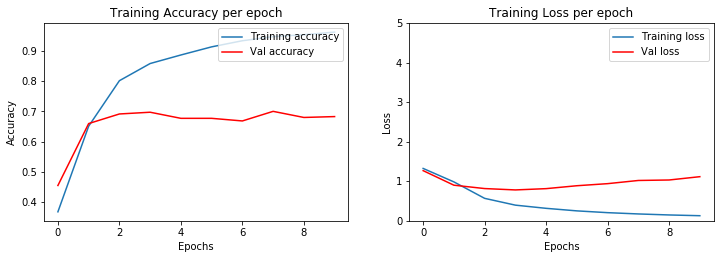

In [44]:
# Answer here
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title('Training Accuracy per epoch')
plt.plot(training_log['epoch'][:10],training_log['accuracy'][:10], label='Training accuracy')
plt.plot(training_log['epoch'][:10],training_log['val_accuracy'][:10], label='Val accuracy', color='r')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.subplot(222)
plt.title('Training Loss per epoch')
plt.plot(training_log['epoch'][:10],training_log['loss'][:10], label='Training loss')
plt.plot(training_log['epoch'][:10],training_log['val_loss'][:10], label='Val loss', color='r')
plt.ylim([0,5])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Answer here

Those curves in the graphs are called learning curves, which show changes in learning performance over time in terms of experience. 

They are a widely used diagnostic tool in machine learning for algorithms that learn from a training dataset incrementally, and they also can be used to diagnose an underfitting or overfitting model. For example, when the plot of training loss continues to decrease with experience and the validation loss decreases to a point and begins increasing again, this should be an overfitting case. When the training loss remains flat regardless of training and the training loss continues to decrease until the end of training, this should be an underfitting case.

The model can be evaluated on the training dataset and on a hold out validation dataset after each update during training and plots of the measured performance can created to show learning curves. Furthermore, learning curves of model performance can be used to diagnose whether the train or validation datasets are not relatively representative of the problem domain.

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [45]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
490,10490,Take public opinion on revenge with Pakistan i...,"[Take, public, opinion, on, revenge, with, Pak..."
1875,21018,My goals are so big they scare small minds,"[My, goals, are, so, big, they, scare, small, ..."
1146,20289,"@PanicAtTheDisco hey, y'all announced it like ...","[@, PanicAtTheDisco, hey, ,, y'all, announced,..."
2878,40051,@Christy_RTR @doge_e_fresh I'm despondent,"[@, Christy_RTR, @, doge_e_fresh, I, 'm, despo..."
432,10432,@sarah_urbina why do you even beef Sara you le...,"[@, sarah_urbina, why, do, you, even, beef, Sa..."


In [46]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Take', 'public', 'opinion', 'on', 'revenge', 'with', 'Pakistan', 'if', 'govt', 'is', 'unable', 'to', 'decide', '.', '@', 'aajtak', '@', 'TimesNow', '@', 'narendramodi']),
       list(['My', 'goals', 'are', 'so', 'big', 'they', 'scare', 'small', 'minds']),
       list(['@', 'PanicAtTheDisco', 'hey', ',', "y'all", 'announced', 'it', 'like', 'immediately', 'after', 'I', 'asked', '.', 'Nice', '.', 'Thanks', "y'all", '#', 'panic'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [47]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
490,10490,Take public opinion on revenge with Pakistan i...,"[Take, public, opinion, on, revenge, with, Pak..."
1875,21018,My goals are so big they scare small minds,"[My, goals, are, so, big, they, scare, small, ..."
1146,20289,"@PanicAtTheDisco hey, y'all announced it like ...","[@, PanicAtTheDisco, hey, ,, y'all, announced,..."
2878,40051,@Christy_RTR @doge_e_fresh I'm despondent,"[@, Christy_RTR, @, doge_e_fresh, I, 'm, despo..."
432,10432,@sarah_urbina why do you even beef Sara you le...,"[@, sarah_urbina, why, do, you, even, beef, Sa..."


In [48]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [49]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([-0.24391222,  0.47471216,  0.60607815,  0.6043044 ,  0.30354637,
        0.52612245,  0.15907517,  0.31419995,  0.6662399 ,  0.34005383,
        0.23928903, -0.61682016,  0.26809034,  0.9209747 ,  0.5685452 ,
        0.17348199, -0.22674245,  0.5710754 , -0.35357958,  0.28677517,
        0.01680611, -0.82201445, -0.52795696, -0.3910232 , -0.8960669 ,
        0.14471053,  0.00526888, -0.86870104,  0.08562313,  0.44321737,
        0.36372796,  0.43732086, -0.3116185 , -0.46474335, -0.1590641 ,
        0.22266756, -0.4517335 ,  0.0837204 , -0.29009768,  0.87018347,
       -0.09992531, -0.6604294 , -0.29516825,  0.6239462 ,  0.08360109,
        0.38526478,  0.45437548, -1.1009585 , -0.46836132,  0.12104732,
       -0.3106531 ,  0.7249717 ,  0.1630029 ,  1.2424423 , -0.22231476,
       -0.2038668 ,  0.8779491 ,  0.3843941 ,  0.04376961, -0.2400986 ,
        0.19544724, -0.20151754,  0.18958779, -0.39637595, -0.4278381 ,
       -0.20163637,  0.37303543,  0.12325621,  0.9450939 ,  0.48

In [50]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('blessed', 0.9530322551727295),
 ('Online', 0.9481726884841919),
 ('bday', 0.940153956413269),
 ('free', 0.9350682497024536),
 ("'you", 0.9343327283859253),
 ('O', 0.9317790865898132),
 ('birthday', 0.9302517175674438),
 ('Be', 0.9287924766540527),
 ('.\\nA', 0.9231827259063721),
 ('inadvertently', 0.9227174520492554)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [51]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [52]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.9336150288581848),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [53]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


# Answer here

Since words are basic elements in languages rather than sentences, knowing the meaning of each word and the relationship between words in a text are quite important. The objective of using word vectors is that we are looking for the transitional probabilities between words, which are simply discrete states: the likelihood that they will co-occur.

Word vectors, which show distributed numerical representations of word features, can detect similarities mathematically without human intervention. For example, measuring cosine similarity, no similarity is expressed as a 90 degree angle, while total similarity of 1 is a 0 degree angle, complete overlap. So that we can group the vectors of similar words together in vectorspace. 

Word2vec, which is the model that utilize word vectors for inference, can make highly accurate guesses about the meaning of a word based on past appearances. Those guesses can be used to establish the association with other words, or cluster documents and classify them by topic. Those clusters can form the basis of search, sentiment analysis and recommendations in such diverse fields as scientific research, legal discovery, e-commerce and customer relationship management.

The output of such model is a vocabulary in which each item has a vector attached to it, which can be fed into a deep-learning network or simply queried to detect relationships between words.

### 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [55]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [56]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![Imgur](pics/pic6.png)

In [57]:
('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [58]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)


## 9. High-dimension Visualization: t-SNE

No matter if you use the Bag-of-words, tf-idf, or word2vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient...

Our aim will be to create a visualization similar to the one below:

![Image](pics/pic7.png)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

Here we would like to introduce another visualization method called t-SNE.  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 

### 9.1 Prepare visualizing target

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [59]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.1 Plot using t-SNE (2-dimension)

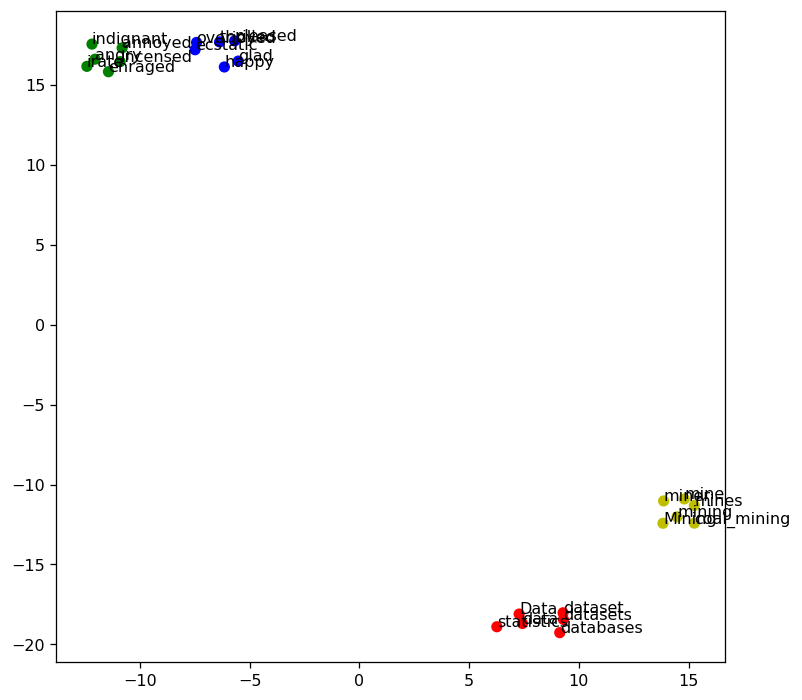

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

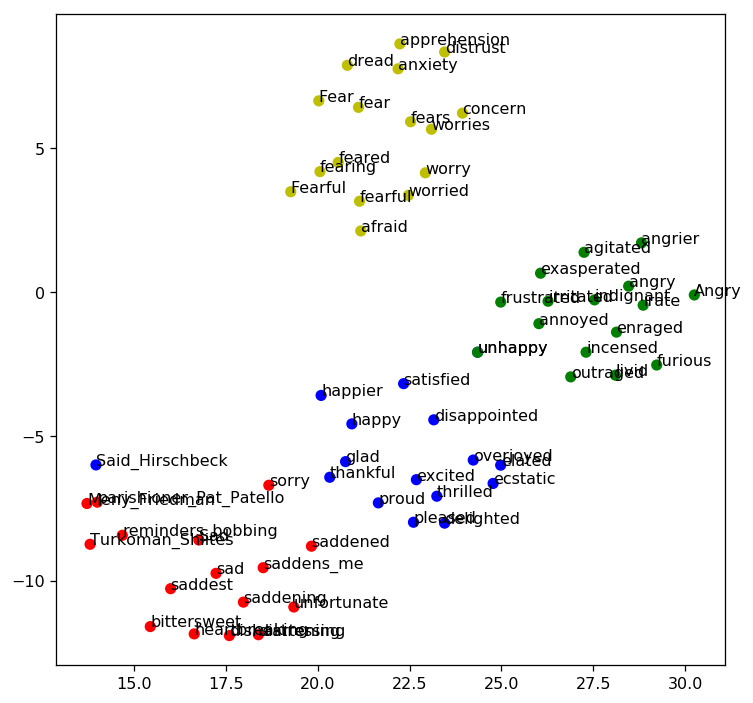

In [61]:
# Answer here

word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

target_words = happy_words + angry_words + sad_words + fear_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## 10. Elmo embeddings

Besides Word2Vec, several other pretrained models for generating embeddings exist. Here, we'll take a look at ElMo embeddings.
Elmo is a language model trained on a task to predict the next word in a sequence of words, but is bidirectional (unlike word2vec).

[Image](pic/pics8.png)

Source: (http://jalammar.github.io/illustrated-bert/)

To embed the sentences, we need to tokenize them and get them into a tensor of uniform shape.This means every sentence should have the same amount of tokens  (ie. If we have 5 sentences, we should have an array of 5 * x ). We will achieve this through padding, or adding "" at the end of each sentence for each missing token up to x.

We'll be using the Keras tokenizer to tokenize and pad. Keras tokenizer will first map each word to a number, and we'll get the tokenizing below in the text_tok_keras column.

In [62]:
from keras.preprocessing.text import Tokenizer

#Initializing tokenizer, getting rid of some punctuation
tokenizer_keras = Tokenizer(filters='"#%&()*+,-./:;<=>@[\]^`{|}~')
tokenizer_keras.fit_on_texts(train_df['text'])
train_df['text_tok_keras'] = tokenizer_keras.texts_to_sequences(train_df['text'])
train_df.head()

,id,text,emotion,intensity,text_tokenized,text_tok_keras
490,10490,Take public opinion on revenge with Pakistan i...,anger,0.458,"[Take, public, opinion, on, revenge, with, Pak...","[208, 1187, 1424, 14, 209, 22, 282, 33, 2509, ..."
1875,21018,My goals are so big they scare small minds,fear,0.250,"[My, goals, are, so, big, they, scare, small, ...","[10, 757, 28, 18, 340, 51, 480, 1425, 1426]"
1146,20289,"@PanicAtTheDisco hey, y'all announced it like ...",fear,0.625,"[@, PanicAtTheDisco, hey, ,, y'all, announced,...","[1427, 517, 518, 2512, 12, 27, 1428, 110, 3, 3..."
2878,40051,@Christy_RTR @doge_e_fresh I'm despondent,sadness,0.806,"[@, Christy_RTR, @, doge_e_fresh, I, 'm, despo...","[4991, 4992, 25, 2513]"
432,10432,@sarah_urbina why do you even beef Sara you le...,anger,0.479,"[@, sarah_urbina, why, do, you, even, beef, Sa...","[4993, 78, 50, 8, 114, 1813, 4994, 8, 138, 1, ..."


In [63]:
#check the lenght of the tokenized sentences
list(map(lambda x: len(x), train_df['text_tok_keras'].iloc[:5]))

[16, 9, 14, 4, 24]

As we discudded, the lenght of the tokenized sentences is not the same, so we pad.

In [64]:
from keras.preprocessing.sequence import pad_sequences

#pad sequences
maxlen = 30 # arbitrary
padded_tokens = pad_sequences(train_df['text_tok_keras'],  maxlen=maxlen, padding="post")
train_df['text_tok_keras'] = list(padded_tokens)
train_df.head()

,id,text,emotion,intensity,text_tokenized,text_tok_keras
490,10490,Take public opinion on revenge with Pakistan i...,anger,0.458,"[Take, public, opinion, on, revenge, with, Pak...","[208, 1187, 1424, 14, 209, 22, 282, 33, 2509, ..."
1875,21018,My goals are so big they scare small minds,fear,0.250,"[My, goals, are, so, big, they, scare, small, ...","[10, 757, 28, 18, 340, 51, 480, 1425, 1426, 0,..."
1146,20289,"@PanicAtTheDisco hey, y'all announced it like ...",fear,0.625,"[@, PanicAtTheDisco, hey, ,, y'all, announced,...","[1427, 517, 518, 2512, 12, 27, 1428, 110, 3, 3..."
2878,40051,@Christy_RTR @doge_e_fresh I'm despondent,sadness,0.806,"[@, Christy_RTR, @, doge_e_fresh, I, 'm, despo...","[4991, 4992, 25, 2513, 0, 0, 0, 0, 0, 0, 0, 0,..."
432,10432,@sarah_urbina why do you even beef Sara you le...,anger,0.479,"[@, sarah_urbina, why, do, you, even, beef, Sa...","[4993, 78, 50, 8, 114, 1813, 4994, 8, 138, 1, ..."


Now we map back to words to obtain the padded tokenized representations in the text_tok_keras_words column.

In [65]:
#map back to words
reverse_word_map = dict(map(reversed, tokenizer_keras.word_index.items()))
train_df['text_tok_keras_words'] = train_df['text_tok_keras'].apply(lambda x_list: [reverse_word_map[x] if x>0 else "" for x in x_list])
train_df.head()

,id,text,emotion,intensity,text_tokenized,text_tok_keras,text_tok_keras_words
490,10490,Take public opinion on revenge with Pakistan i...,anger,0.458,"[Take, public, opinion, on, revenge, with, Pak...","[208, 1187, 1424, 14, 209, 22, 282, 33, 2509, ...","[take, public, opinion, on, revenge, with, pak..."
1875,21018,My goals are so big they scare small minds,fear,0.250,"[My, goals, are, so, big, they, scare, small, ...","[10, 757, 28, 18, 340, 51, 480, 1425, 1426, 0,...","[my, goals, are, so, big, they, scare, small, ..."
1146,20289,"@PanicAtTheDisco hey, y'all announced it like ...",fear,0.625,"[@, PanicAtTheDisco, hey, ,, y'all, announced,...","[1427, 517, 518, 2512, 12, 27, 1428, 110, 3, 3...","[panicatthedisco, hey, y'all, announced, it, l..."
2878,40051,@Christy_RTR @doge_e_fresh I'm despondent,sadness,0.806,"[@, Christy_RTR, @, doge_e_fresh, I, 'm, despo...","[4991, 4992, 25, 2513, 0, 0, 0, 0, 0, 0, 0, 0,...","[christy_rtr, doge_e_fresh, i'm, despondent, ,..."
432,10432,@sarah_urbina why do you even beef Sara you le...,anger,0.479,"[@, sarah_urbina, why, do, you, even, beef, Sa...","[4993, 78, 50, 8, 114, 1813, 4994, 8, 138, 1, ...","[sarah_urbina, why, do, you, even, beef, sara,..."


Now, we use the Tensorflow Hub to charge a pretrained Elmo model. TensorFlow Hub is a library for reusable machine learning models. You can learn more here:
Source: (https://www.tensorflow.org/hub)
Make sure tensor has appropriate size!


In [66]:
import tensorflow as tf
import tensorflow_hub as hub

#load elmo
elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable = True)

#generic way to generate an array of the same length
token_len = np.empty(len(train_df))
token_len.fill(maxlen)

#create embeddings
embeddings = elmo(inputs={"tokens": list(train_df['text_tok_keras_words']),
                          "sequence_len": token_len},
                  signature="tokens",
                  as_dict=True)["elmo"]


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [67]:
#check the Embedding layer dimension
embeddings.shape

TensorShape([Dimension(3613), Dimension(30), Dimension(1024)])

To embed a word, you need to pass the position of the token. Let's take the first sentence:

In [10]:
train_df['text'].iloc[0]

'@SusannahSpot I could pop round '

In [ ]:
# this might take a long time, make sure you can run Tf on your computer
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

print("SusannahSpot")
print(sess.run(embeddings[0][1]))

print("I")
print(sess.run(embeddings[0][1]))

print("could")
print(sess.run(embeddings[0][2]))

print("pop")
print(sess.run(embeddings[0][3]))

print("round")
print(sess.run(embeddings[0][4]))

---

# Kaggle Competition

For preprocessing, I split the original data set to training and test sets by the content of emotion. If the contents are NaNs, then they should belong to test set, otherwise they should belong to training set. Then I tokenize each word in the text. After that, I calculate the max length of each sentence of the training set and test set, and then do zero-padding to each data to make the length of them become equal. The final step is to split the training set into train and validation parts, and do one-hot encoding to those labels.

For training model, I use a bidirectional LSTM with Glove embedding and an attention layer. The Glove embedding has pretrained weights, I use it to the embedding layer. The bidirectional LSTM can capture the relationship of contexts, and the attention layer can make the model focus on those more critical words. The softmax layer is to make the output vectors become probabilities, so thst the max entry is set to be 1, others are set to 0. Through the optimization steps, the model can learn to classify and do sentiment analysis of sentences.

I first tried tfidf, but the result was not as good as word vectors and Glove. Since the training data is quite large, it's hard to use all features in tfidf, I think that is the reason why it performs not so well. 

In [1]:
import pandas as pd
df = pd.read_json('tweets_DM.json',orient='column',lines=True)

In [2]:
from pandas.io.json import json_normalize

data = pd.DataFrame(columns = ['tweet_id','text','hashtags'])
data['tweet_id'] = json_normalize(df['_source'])['tweet.tweet_id']
data['text'] = json_normalize(df['_source'])['tweet.text']
data['hashtags'] = json_normalize(df['_source'])['tweet.hashtags']

In [3]:
emotion = pd.read_csv('./emotion.csv')
merge_data = data.merge(emotion,how='outer',on='tweet_id')
merge_data

,tweet_id,text,hashtags,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat],anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]",sadness
2,0x28b412,"Confident of your obedience, I write to you, k...",[bibleverse],NaN
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[],fear
4,0x2de201,"""Trust is not the same as faith. A friend is s...",[],NaN
5,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,"[authentic, LaughOutLoud]",joy
6,0x2c91a8,Still waiting on those supplies Liscus. <LH>,[],anticipation
7,0x368e95,Love knows no gender. 😢😭 <LH>,[],joy
8,0x249c0c,@DStvNgCare @DStvNg More highlights are being ...,[LeagueCup],sadness
9,0x218443,When do you have enough ? When are you satisfi...,"[materialism, money, possessions]",NaN


In [4]:
train = merge_data.dropna(inplace=False)
test = merge_data[~merge_data.index.isin(train.index)]
train.reset_index(drop=True)
test.reset_index(drop=True)

,tweet_id,text,hashtags,emotion
0,0x28b412,"Confident of your obedience, I write to you, k...",[bibleverse],NaN
1,0x2de201,"""Trust is not the same as faith. A friend is s...",[],NaN
2,0x218443,When do you have enough ? When are you satisfi...,"[materialism, money, possessions]",NaN
3,0x2939d5,"God woke you up, now chase the day #GodsPlan #...","[GodsPlan, GodsWork]",NaN
4,0x26289a,"In these tough times, who do YOU turn to as yo...",[],NaN
5,0x31c6e0,Turns out you can recognise people by their un...,[],NaN
6,0x32edee,"I like how Hayvens mommy, daddy, and the keybo...",[sheltered],NaN
7,0x3714ee,I just love it when every single one of my son...,[notamused],NaN
8,0x235628,@JulieChen when can we expect a season of #Cel...,[CelebrityBigBrother],NaN
9,0x283024,Tbh. Regret hurts more than stepping on a LEGO...,[],NaN


In [5]:
train

,tweet_id,text,hashtags,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",[Snapchat],anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...","[freepress, TrumpLegacy, CNN]",sadness
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,[],fear
5,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,"[authentic, LaughOutLoud]",joy
6,0x2c91a8,Still waiting on those supplies Liscus. <LH>,[],anticipation
7,0x368e95,Love knows no gender. 😢😭 <LH>,[],joy
8,0x249c0c,@DStvNgCare @DStvNg More highlights are being ...,[LeagueCup],sadness
10,0x359db9,The #SSM debate; <LH> (a manufactured fantasy ...,"[SSM, gender, diversity]",anticipation
11,0x23b037,I love suffering 🙃🙃 I love when valium does no...,[],joy
12,0x1fde89,Can someone tell my why my feeds scroll back t...,[Pissed],anger


In [6]:
test

,tweet_id,text,hashtags,emotion
2,0x28b412,"Confident of your obedience, I write to you, k...",[bibleverse],NaN
4,0x2de201,"""Trust is not the same as faith. A friend is s...",[],NaN
9,0x218443,When do you have enough ? When are you satisfi...,"[materialism, money, possessions]",NaN
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #...","[GodsPlan, GodsWork]",NaN
33,0x26289a,"In these tough times, who do YOU turn to as yo...",[],NaN
35,0x31c6e0,Turns out you can recognise people by their un...,[],NaN
37,0x32edee,"I like how Hayvens mommy, daddy, and the keybo...",[sheltered],NaN
46,0x3714ee,I just love it when every single one of my son...,[notamused],NaN
49,0x235628,@JulieChen when can we expect a season of #Cel...,[CelebrityBigBrother],NaN
56,0x283024,Tbh. Regret hurts more than stepping on a LEGO...,[],NaN


In [7]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer

def preprocess(text):
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in set(string.punctuation)]
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     /home/research/Fenglien/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/research/Fenglien/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [8]:
from tqdm import tqdm

tqdm.pandas()
train['text'] = train['text'].progress_apply(lambda x: preprocess(x))
test['text'] = test['text'].progress_apply(lambda x: preprocess(x))

100%|██████████| 1455563/1455563 [13:58<00:00, 1736.43it/s]
/home/research/Fenglien/Python/Fenglien/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
100%|██████████| 411972/411972 [04:30<00:00, 1520.81it/s]
/home/research/Fenglien/Python/Fenglien/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
train_MAXLEN = max(train['text'].apply(lambda d: len(d)))
test_MAXLEN = max(train['text'].apply(lambda d: len(d)))
print(train_MAXLEN)
print(test_MAXLEN)

45
45


In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['text'])
train['text'] = tokenizer.texts_to_sequences(train['text'])
train['text'] = list(pad_sequences(train['text'], maxlen = 45, padding='post'))
train.head()

/home/research/Fenglien/Python/Fenglien/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/research/Fenglien/Python/Fenglien/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,tweet_id,text,hashtags,emotion
0,0x376b20,"[65, 62, 469, 41, 988, 19, 14, 1115, 44, 293, ...",[Snapchat],anticipation
1,0x2d5350,"[13366, 240, 32, 79, 208, 8, 2374, 3, 28917, 2...","[freepress, TrumpLegacy, CNN]",sadness
3,0x1cd5b0,"[66, 556, 8, 6336, 2269, 858, 1, 0, 0, 0, 0, 0...",[],fear
5,0x1d755c,"[115781, 156394, 1627, 9, 2, 119, 58, 177, 37,...","[authentic, LaughOutLoud]",joy
6,0x2c91a8,"[103, 331, 14, 187, 3051, 260999, 1, 0, 0, 0, ...",[],anticipation


In [13]:
tokenizer.fit_on_texts(test['text'])
test['text'] = tokenizer.texts_to_sequences(test['text'])
test['text'] = list(pad_sequences(test['text'], maxlen = 45, padding='post'))
test.head()

/home/research/Fenglien/Python/Fenglien/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/research/Fenglien/Python/Fenglien/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,hashtags,emotion
2,0x28b412,"[2831, 10, 16, 3517, 3, 901, 4, 6, 902, 15, 6,...",[bibleverse],NaN
4,0x2de201,"[43, 352, 8, 29, 2, 225, 5, 238, 5, 137, 8, 15...",[],NaN
9,0x218443,"[38, 27, 6, 25, 325, 38, 21, 6, 3584, 8, 6, 53...","[materialism, money, possessions]",NaN
30,0x2939d5,"[53, 515, 6, 42, 66, 2386, 2, 39, 13938, 27240...","[GodsPlan, GodsWork]",NaN
33,0x26289a,"[11, 192, 1295, 59, 62, 27, 6, 409, 4, 5, 16, ...",[],NaN


In [108]:
from sklearn.preprocessing import LabelEncoder
import keras
label_encoder = LabelEncoder()
label_encoder.fit(np.array(merge_data.dropna(inplace=False)['emotion']))

def label_encode(le, labels):
    enc = le.fit_transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

train['emotion'] = pd.DataFrame(label_encode(label_encoder, np.array(merge_data.dropna(inplace=False)['emotion'])).astype(int)).values.tolist()

/home/research/Fenglien/Python/Fenglien/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train['text'], train['emotion'], random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1091672,)
(363891,)
(1091672,)
(363891,)


In [52]:
VOCABSIZE = max([max(sublist) for sublist in train['text'].values])+1
print(VOCABSIZE)

1008252


In [53]:
embeddings_index = {}
f = open('./glove.840B.300d.txt')

for line in f:
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 2196016 word vectors.


In [54]:
embedding_dim = 300
embedding_matrix = np.zeros((VOCABSIZE, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < VOCABSIZE:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [55]:
# https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [56]:
# https://github.com/richliao/textClassifier/blob/master/textClassifierHATT.py
from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras import initializers

class AttLayer(Layer):
    def __init__(self, attention_dim):
        self.init = initializers.get('normal')
        self.supports_masking = True
        self.attention_dim = attention_dim
        super(AttLayer, self).__init__()

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)), name='W')
        self.b = K.variable(self.init((self.attention_dim, )), name='b')
        self.u = K.variable(self.init((self.attention_dim, 1)), name='u')
        self.trainable_weights = [self.W, self.b, self.u]
        super(AttLayer, self).build(input_shape)

    def compute_mask(self, inputs, mask=None):
        return mask

    def call(self, x, mask=None):
        # size of x :[batch_size, sel_len, attention_dim]
        # size of u :[batch_size, attention_dim]
        # uit = tanh(xW+b)
        uit = K.tanh(K.bias_add(K.dot(x, self.W), self.b))
        ait = K.dot(uit, self.u)
        ait = K.squeeze(ait, -1)

        ait = K.exp(ait)

        if mask is not None:
            # Cast the mask to floatX to avoid float64 upcasting in theano
            ait *= K.cast(mask, K.floatx())
        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        ait = K.expand_dims(ait)
        weighted_input = x * ait
        output = K.sum(weighted_input, axis=1)

        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

In [156]:
from keras.models import Model
from keras.layers import Input, Dense, Embedding, GlobalMaxPool1D, Dropout, Bidirectional, LSTM, Conv1D, Concatenate
from keras.optimizers import Adam


text_input = Input(shape=(None,), name='text_input')
emb = Embedding(VOCABSIZE, embedding_dim, weights=[embedding_matrix], input_length=45)(text_input)
do1 = Dropout(0.5)(emb)
bilstm = Bidirectional(LSTM(128, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))(do1)
# con = Conv1D(64, 3, activation = 'relu')(bilstm)
# gmp = GlobalMaxPool1D()(bilstm)
att = AttLayer(128)(bilstm)
combined = Dense(128, activation='relu')(att)
combined = Dense(64, activation='relu')(combined)
# combined = Dropout(0.5)(combined)
combined = Dense(8, activation='softmax')(combined)

model = Model(inputs=[text_input], outputs=[combined])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', f1_m])

model.summary()

tracking <tf.Variable 'att_layer_9/W:0' shape=(256, 128) dtype=float32> W
tracking <tf.Variable 'att_layer_9/b:0' shape=(128,) dtype=float32> b
tracking <tf.Variable 'att_layer_9/u:0' shape=(128, 1) dtype=float32> u
Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_input (InputLayer)      (None, None)              0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 45, 300)           302475600 
_________________________________________________________________
dropout_9 (Dropout)          (None, 45, 300)           0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 45, 256)           439296    
_________________________________________________________________
att_layer_9 (AttLayer)       (None, 256)               33024     
_________________________________________

In [160]:
import pickle

pickle.dump(X_train, open("X_train.pkl", "wb"))
pickle.dump(X_test, open("X_test.pkl", "wb"))
pickle.dump(y_train, open("y_train.pkl", "wb"))
pickle.dump(y_test, open("y_test.pkl", "wb"))
pickle.dump(test, open("test.pkl", "wb"))

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('../training_log.csv')

# training setting
epochs = 5
batch_size = 256

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Train on 1091672 samples, validate on 363891 samples
Epoch 1/5
 526848/1091672 [=============>................] - ETA: 2:52:52 - loss: 1.3137 - accuracy: 0.5236 - f1_m: 0.4514

In [ ]:
import numpy as np
pred_result = model.predict(test['text'], batch_size=256)
pred_result = label_decode(label_encoder, pred_result)
result = test[['tweet_id','emotion']]
result['emotion'] = pred_result
result.to_csv('./result4.csv',index=False)

# Comments

In lab2, there are many inspiring ideas that provide us some ways to try both the Kaggle competition and AI-cup. However, sometimes the explaination is not enough for beginners to have the intuition for further usage. Another thing is most students don't have powerful computational resources, either GPU or large memories. If they cannot fetch those tools, it's hard to work on the whole homework and the AI competition. As I mentioned above, the dataset of Kaggle competition is a bit too large, so students may encounter the probelms such as memory error or taking more than a day to run the program. Hope these problems can be solved in the future.